In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold

In [50]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, fbeta_score,make_scorer
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [51]:
df_new = pd.read_csv('no_show_new1.csv')

In [52]:
from sklearn.preprocessing import StandardScaler

df_num = df_new[['Age','Waitingperiod']]
df_cat = df_new.drop(['Age','Waitingperiod'],axis = 1)

ss = StandardScaler()

num_ss = ss.fit_transform(df_num)

df_num_ss = pd.DataFrame(num_ss, columns = df_num.columns)

df_new2 = pd.concat([df_num_ss, df_cat], axis = 1)

df_new2.head()

,Age,Waitingperiod,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,prior_appointments,regular_patient,prior_no_shows,Neighbourhood_Group1,Neighbourhood_Group2,Neighbourhood_Group3,Neighbourhood_Group4,Neighbourhood_Group5,Neighbourhood_Group6,Neighbourhood_Group7
0,0.763817,-0.715729,0,0.000000,1,0,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0,0,1,0,0,0,0
1,0.763817,-0.715729,1,0.000000,0,0,0.000000,0.000000,0.000000,0,1.000000,1,0.000000,0,0,1,0,0,0,0
2,1.027555,-0.715729,0,0.000000,0,0,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,1,0,0,0,0,0,0
3,-1.346083,-0.715729,0,0.000000,0,0,0.000000,0.000000,0.000000,0,1.000000,1,0.000000,1,0,0,0,0,0,0
4,0.763817,-0.715729,0,0.000000,1,1,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0,0,1,0,0,0,0


In [53]:
X = df_new2.drop('No-show', axis = 1)
y = df_new2['No-show']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3, stratify=y) 

In [54]:
def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

smt = SMOTE(random_state=10)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 61743, 1: 15623})
After Counter({0: 61743, 1: 61743})


In [56]:
rf_tuned = RandomForestClassifier(**{'criterion': 'entropy','max_depth': 2,'max_features': 14,'min_samples_leaf': 30,
                                     'n_estimators': 97}, random_state = 42)
rf_tuned.fit(X_train_sm, y_train_sm)

y_pred_train = rf_tuned.predict(X_train_sm)
y_prob_train = rf_tuned.predict_proba(X_train_sm)[:,1]

y_pred_test = rf_tuned.predict(X_test)
y_prob_test = rf_tuned.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train','\n' ,confusion_matrix(y_train_sm,y_pred_train),'\n')
print('Classification Report -Train','\n' ,classification_report(y_train_sm,y_pred_train))
print('F2-Train', '\n' ,fbeta_score(y_train_sm,y_pred_train, beta = 2),'\n')
print('ROC_AUC-Train', '\n' ,roc_auc_score(y_train_sm,y_prob_train),'\n')

print('Confusion Matrix-Test', '\n' ,confusion_matrix(y_test,y_pred_test),'\n')
print('Classification Report -Test','\n' ,classification_report(y_test,y_pred_test))
print('F2-Test', '\n' ,fbeta_score(y_test,y_pred_test, beta = 2),'\n')
print('ROC_AUC-Test','\n' , roc_auc_score(y_test,y_prob_test),'\n')

Confusion Matrix-Train 
 [[27909 33834]
 [ 5414 56329]] 

Classification Report -Train 
               precision    recall  f1-score   support

           0       0.84      0.45      0.59     61743
           1       0.62      0.91      0.74     61743

    accuracy                           0.68    123486
   macro avg       0.73      0.68      0.66    123486
weighted avg       0.73      0.68      0.66    123486

F2-Train 
 0.8354071810995595 

ROC_AUC-Train 
 0.7831316665940615 

Confusion Matrix-Test 
 [[11931 14531]
 [  783  5913]] 

Classification Report -Test 
               precision    recall  f1-score   support

           0       0.94      0.45      0.61     26462
           1       0.29      0.88      0.44      6696

    accuracy                           0.54     33158
   macro avg       0.61      0.67      0.52     33158
weighted avg       0.81      0.54      0.57     33158

F2-Test 
 0.6260057592953333 

ROC_AUC-Test 
 0.7470275786915475 



In [42]:
imp = pd.DataFrame(rf_tuned.feature_importances_, index = X_train_sm.columns, columns = ['importance']).reset_index()

imp = imp.sort_values('importance',ascending = False)

imp

,index,importance
1,Waitingperiod,0.608530
11,prior_no_shows,0.361211
8,SMS_received,0.020031
9,prior_appointments,0.006684
0,Age,0.002487
10,regular_patient,0.001058
5,Diabetes,0.000000
6,Alcoholism,0.000000
7,Handcap,0.000000
4,Hipertension,0.000000


In [43]:
imp1 = imp[0:5]

In [46]:
plt.rcParams['figure.figsize'] = [10,8]

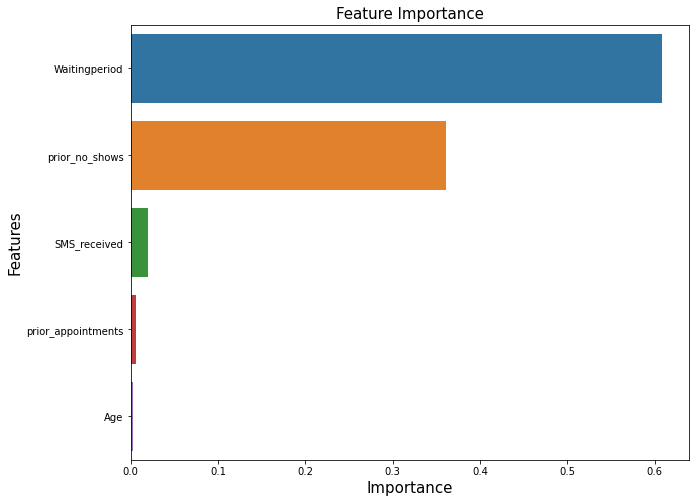

In [47]:
plt.figure
sns.barplot(x = 'importance', y = 'index', data = imp1)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [10]:
!pip install shap

In [26]:
import shap
shap.initjs()
explainer = shap.Explainer(rf_tuned.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 33159it [1:11:52,  7.68it/s]                                                                    


In [28]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

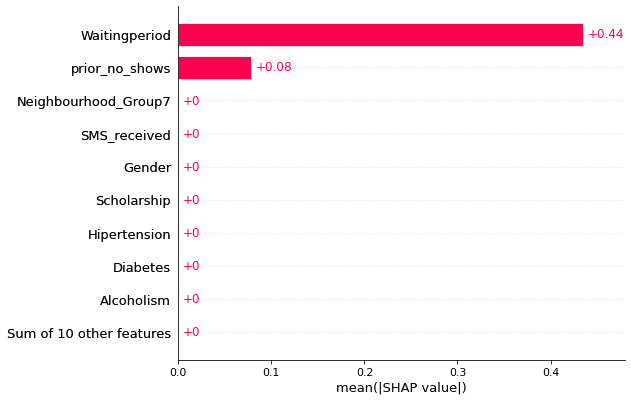

In [31]:
shap.plots.bar(shap_values)

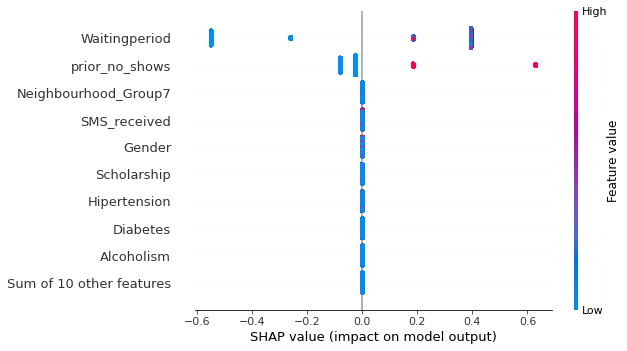

In [41]:
shap.plots.beeswarm(shap_values)

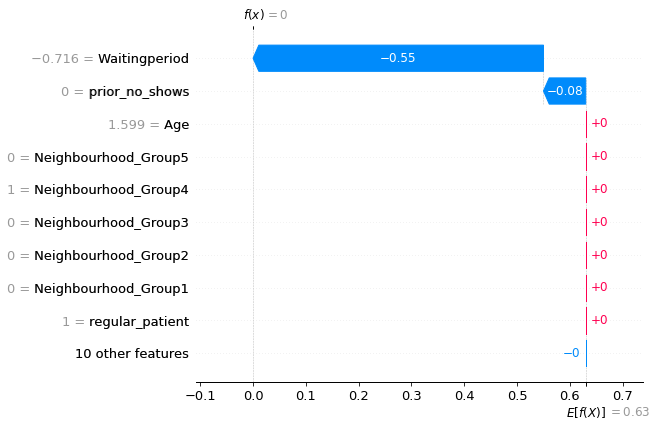

In [32]:
shap.plots.waterfall(shap_values[0])

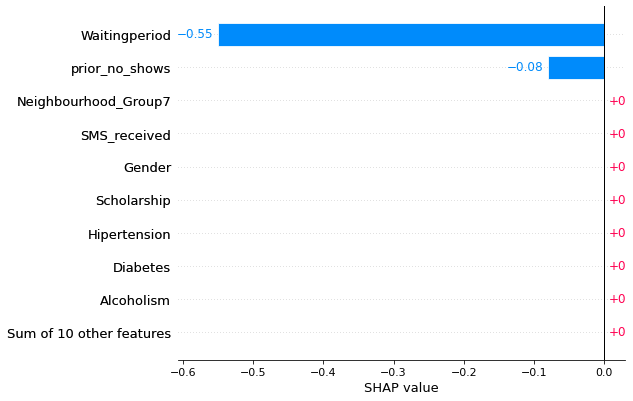

In [33]:
shap.plots.bar(shap_values[0])

In [12]:
ab_rf = AdaBoostClassifier(base_estimator = rf_tuned, random_state = 42)
ab_rf.fit(X_train_sm,y_train_sm)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=2,
                                                         max_features=14,
                                                         min_samples_leaf=30,
                                                         n_estimators=97,
                                                         random_state=42),
                   random_state=42)

In [14]:
y_pred_train = ab_rf.predict(X_train_sm)
y_prob_train = ab_rf.predict_proba(X_train_sm)[:,1]

y_pred_test = ab_rf.predict(X_test)
y_prob_test = ab_rf.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train','\n' ,confusion_matrix(y_train_sm,y_pred_train),'\n')
print('Classification Report -Train','\n' ,classification_report(y_train_sm,y_pred_train))
print('F2-Train', '\n' ,fbeta_score(y_train_sm,y_pred_train, beta = 2),'\n')
print('ROC_AUC-Train', '\n' ,roc_auc_score(y_train_sm,y_prob_train),'\n')

print('Confusion Matrix-Test', '\n' ,confusion_matrix(y_test,y_pred_test),'\n')
print('Classification Report -Test','\n' ,classification_report(y_test,y_pred_test))
print('F2-Test', '\n' ,fbeta_score(y_test,y_pred_test, beta = 2),'\n')
print('ROC_AUC-Test','\n' , roc_auc_score(y_test,y_prob_test),'\n')

Confusion Matrix-Train 
 [[50543 11200]
 [12287 49456]] 

Classification Report -Train 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     61743
           1       0.82      0.80      0.81     61743

    accuracy                           0.81    123486
   macro avg       0.81      0.81      0.81    123486
weighted avg       0.81      0.81      0.81    123486

F2-Train 
 0.8038280000520108 

ROC_AUC-Train 
 0.8921804413839886 

Confusion Matrix-Test 
 [[21661  4801]
 [ 3040  3656]] 

Classification Report -Test 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     26462
           1       0.43      0.55      0.48      6696

    accuracy                           0.76     33158
   macro avg       0.65      0.68      0.66     33158
weighted avg       0.79      0.76      0.77     33158

F2-Test 
 0.5187139979001731 

ROC_AUC-Test 
 0.7776077790410576 

